In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d haithemhermessi/sanad-dataset

Dataset URL: https://www.kaggle.com/datasets/haithemhermessi/sanad-dataset
License(s): U.S. Government Works
 85% 56.0M/65.7M [00:00<00:00, 82.0MB/s]
100% 65.7M/65.7M [00:01<00:00, 63.6MB/s]


In [ ]:
!unzip sanad-dataset

Streaming output truncated to the last 5000 lines.
  inflating: Tech/1500.txt           
  inflating: Tech/1501.txt           
  inflating: Tech/1502.txt           
  inflating: Tech/1503.txt           
  inflating: Tech/1504.txt           
  inflating: Tech/1505.txt           
  inflating: Tech/1506.txt           
  inflating: Tech/1507.txt           
  inflating: Tech/1508.txt           
  inflating: Tech/1509.txt           
  inflating: Tech/1510.txt           
  inflating: Tech/1511.txt           
  inflating: Tech/1512.txt           
  inflating: Tech/1513.txt           
  inflating: Tech/1514.txt           
  inflating: Tech/1515.txt           
  inflating: Tech/1516.txt           
  inflating: Tech/1517.txt           
  inflating: Tech/1518.txt           
  inflating: Tech/1519.txt           
  inflating: Tech/1520.txt           
  inflating: Tech/1521.txt           
  inflating: Tech/1522.txt           
  inflating: Tech/1523.txt           
  inflating: Tech/1524.txt           

In [ ]:
import os


dataset_dir = 'sanad-dataset'  # Update with the correct directory if needed

In [ ]:
import os
import glob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

# Define the dataset path
dataset_path = '/content/'

# Initialize lists to store texts and topics
texts = []
topics = []

# Define the labels and their corresponding directories
labels_and_dirs = {
    "Culture": f"{dataset_path}/Culture/*.txt",
    "Finance": f"{dataset_path}/Finance/*.txt",
    "Medical": f"{dataset_path}/Medical/*.txt",
    "Politics": f"{dataset_path}/Politics/*.txt",
    "Religion": f"{dataset_path}/Religion/*.txt",
    "Sports": f"{dataset_path}/Sports/*.txt",
    "Tech": f"{dataset_path}/Tech/*.txt",
}

# Read the text files
for label, path_pattern in labels_and_dirs.items():
    print(f"Reading files for label: {label}")
    print(f"Pattern: {path_pattern}")
    files = glob.glob(path_pattern)
    print(f"Found {len(files)} files for label: {label}")
    if not files:
        print(f"No files found for label: {label}. Please check the directory and file paths.")
    for file_path in files:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            texts.append(text)
            topics.append(label)

# Ensure that texts and topics have been populated
if not texts:
    raise ValueError("The dataset appears to be empty. Check the dataset path and file contents.")

# Prepare data for training
X = texts
y = topics

# Convert texts to TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Continue with model training and evaluation


Reading files for label: Culture
Pattern: /content//Culture/*.txt
Found 6500 files for label: Culture
Reading files for label: Finance
Pattern: /content//Finance/*.txt
Found 6500 files for label: Finance
Reading files for label: Medical
Pattern: /content//Medical/*.txt
Found 6500 files for label: Medical
Reading files for label: Politics
Pattern: /content//Politics/*.txt
Found 6500 files for label: Politics
Reading files for label: Religion
Pattern: /content//Religion/*.txt
Found 6500 files for label: Religion
Reading files for label: Sports
Pattern: /content//Sports/*.txt
Found 6500 files for label: Sports
Reading files for label: Tech
Pattern: /content//Tech/*.txt
Found 6500 files for label: Tech


In [ ]:
labels_list = list(labels_and_dirs.keys())
labels_list

['Culture', 'Finance', 'Medical', 'Politics', 'Religion', 'Sports', 'Tech']

In [17]:
from sklearn.model_selection import cross_val_score, train_test_split

# تدريب نموذج Naïve Bayes
naive_bayes = MultinomialNB()
scores_naive_bayes = cross_val_score(naive_bayes, X_tfidf, y, cv=5)

# عرض النتائج لنموذج Naive Bayes
print("الأداء لنموذج Naive Bayes:", scores_naive_bayes)

# إعداد تقارير الأداء
naive_bayes_reports = []

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=i)

    naive_bayes.fit(X_train, y_train)
    y_pred_naive_bayes = naive_bayes.predict(X_test)
    naive_bayes_reports.append(classification_report(y_test, y_pred_naive_bayes))

# عرض تقارير أداء نموذج Naive Bayes
for i in range(5):
    print("تقرير لنموذج Naive Bayes (Fold {}):".format(i + 1))
    print(naive_bayes_reports[i])

الأداء لنموذج Naive Bayes: [0.95648352 0.95934066 0.9567033  0.95967033 0.95549451]
تقرير لنموذج Naive Bayes (Fold 1):
              precision    recall  f1-score   support

     Culture       0.94      0.94      0.94      1291
     Finance       0.99      0.93      0.96      1360
     Medical       0.95      0.98      0.96      1262
    Politics       0.98      0.96      0.97      1247
    Religion       0.93      0.93      0.93      1266
      Sports       1.00      0.98      0.99      1352
        Tech       0.92      0.97      0.94      1322

    accuracy                           0.96      9100
   macro avg       0.96      0.96      0.96      9100
weighted avg       0.96      0.96      0.96      9100

تقرير لنموذج Naive Bayes (Fold 2):
              precision    recall  f1-score   support

     Culture       0.95      0.92      0.94      1340
     Finance       0.99      0.92      0.95      1318
     Medical       0.94      0.98      0.96      1290
    Politics       0.98      0.9

In [18]:
#متوسط الدقة لنموذج Naive Bayes
average_precision_naive_bayes = sum(scores_naive_bayes) / len(scores_naive_bayes)
print("متوسط الدقة لنموذج Naive Bayes:", average_precision_naive_bayes)

متوسط الدقة لنموذج Naive Bayes: 0.9575384615384616


In [19]:
#تعريف المكتبات للكنفيوجن ماتركس
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
import os
from sklearn.svm import LinearSVC

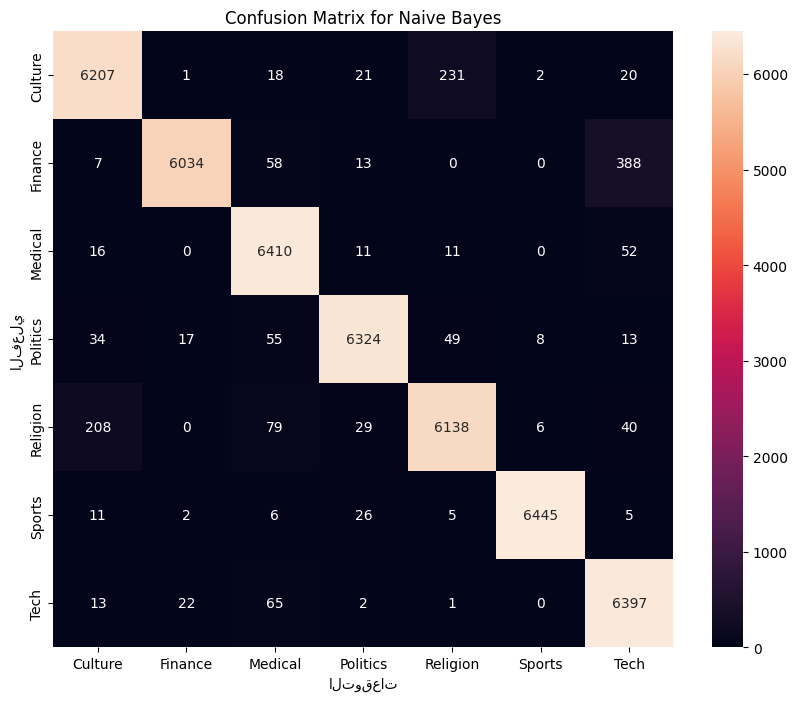

In [20]:
# توقع الفئات على البيانات الكاملة
naive_bayes = MultinomialNB()
naive_bayes.fit(X_tfidf, y)
y_pred_naive_bayes = naive_bayes.predict(X_tfidf)

# إنشاء confusion matrix لنموذج Naive Bayes
conf_matrix_naive_bayes = confusion_matrix(y, y_pred_naive_bayes, labels=labels_list)

# عرض confusion matrix على شكل صورة لنموذج Naive Bayes
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_naive_bayes, annot=True, fmt='d', xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel('التوقعات')
plt.ylabel('الفعلي')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [21]:
#نموذج SVM
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report

# تدريب نموذج LinearSVC
svm_model = LinearSVC()
scores_svm = cross_val_score(svm_model, X_tfidf, y, cv=5)

# عرض النتائج لنموذج LinearSVC
print("الأداء لنموذج LinearSVC:", scores_svm)

# إعداد تقارير الأداء
svm_reports = []

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=i)

    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    svm_reports.append(classification_report(y_test, y_pred_svm))

# عرض تقارير أداء نموذج LinearSVC
for i in range(5):
    print("تقرير لنموذج LinearSVC (Fold {}):".format(i + 1))
    print(svm_reports[i])

الأداء لنموذج LinearSVC: [0.98241758 0.9821978  0.98142857 0.98131868 0.98      ]
تقرير لنموذج LinearSVC (Fold 1):
              precision    recall  f1-score   support

     Culture       0.97      0.98      0.97      1291
     Finance       0.99      0.98      0.99      1360
     Medical       0.98      0.98      0.98      1262
    Politics       0.98      0.99      0.99      1247
    Religion       0.98      0.97      0.97      1266
      Sports       0.99      1.00      0.99      1352
        Tech       0.97      0.98      0.98      1322

    accuracy                           0.98      9100
   macro avg       0.98      0.98      0.98      9100
weighted avg       0.98      0.98      0.98      9100

تقرير لنموذج LinearSVC (Fold 2):
              precision    recall  f1-score   support

     Culture       0.97      0.97      0.97      1340
     Finance       0.99      0.98      0.98      1318
     Medical       0.98      0.99      0.98      1290
    Politics       0.98      0.98     

In [22]:
# متوسط الدقة لنموذج LinearSVC
average_precision_svm = sum(scores_svm) / len(scores_svm)
print("متوسط الدقة لنموذج LinearSVC:", average_precision_svm)

متوسط الدقة لنموذج LinearSVC: 0.9814725274725274


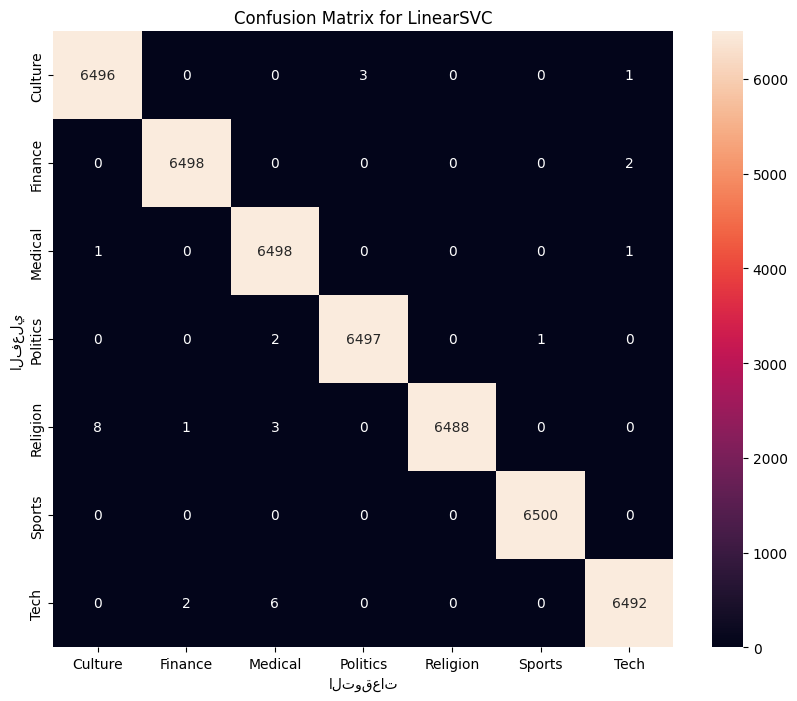

In [24]:
# تدريب نموذج LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_tfidf, y)

# توقع الفئات على البيانات الكاملة لنموذج LinearSVC
y_pred_linear_svc = linear_svc.predict(X_tfidf)

# إنشاء confusion matrix لنموذج LinearSVC
conf_matrix_linear_svc = confusion_matrix(y, y_pred_linear_svc, labels=labels_list)

# عرض confusion matrix على شكل صورة لنموذج LinearSVC
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_linear_svc, annot=True, fmt='d', xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel('التوقعات')
plt.ylabel('الفعلي')
plt.title('Confusion Matrix for LinearSVC')
plt.show()


In [ ]:
# تدريب نموذج Logistic Regression
# استيراد المكتبات اللازمة
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
import numpy as np

# تأكد من أن X_tfidf و y معرفان مسبقاً ويحتويان على البيانات المطلوبة
# هنا نفترض أن X_tfidf و y موجودان بشكل صحيح

# تدريب نموذج Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
scores_logistic_regression = cross_val_score(logistic_regression, X_tfidf, y, cv=5)

# عرض النتائج لنموذج Logistic Regression
print("الأداء لنموذج Logistic Regression (دقة التحقق المتقاطع):", scores_logistic_regression)
print("متوسط الدقة:", np.mean(scores_logistic_regression))

# إعداد تقارير الأداء
logistic_regression_reports = []

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=i)

    logistic_regression.fit(X_train, y_train)
    y_pred_logistic_regression = logistic_regression.predict(X_test)
    report = classification_report(y_test, y_pred_logistic_regression)
    logistic_regression_reports.append(report)
    print(f"تقرير لنموذج Logistic Regression (Fold {i + 1}):")
    print(report)


الأداء لنموذج Logistic Regression (دقة التحقق المتقاطع): [0.97747253 0.97703297 0.9767033  0.97681319 0.97351648]
متوسط الدقة: 0.9763076923076923
تقرير لنموذج Logistic Regression (Fold 1):
              precision    recall  f1-score   support

     Culture       0.97      0.97      0.97      1291
     Finance       0.99      0.98      0.98      1360
     Medical       0.97      0.98      0.98      1262
    Politics       0.97      0.99      0.98      1247
    Religion       0.98      0.95      0.97      1266
      Sports       0.99      0.99      0.99      1352
        Tech       0.97      0.97      0.97      1322

    accuracy                           0.98      9100
   macro avg       0.98      0.98      0.98      9100
weighted avg       0.98      0.98      0.98      9100

تقرير لنموذج Logistic Regression (Fold 2):
              precision    recall  f1-score   support

     Culture       0.97      0.97      0.97      1340
     Finance       0.99      0.97      0.98      1318
     Med

In [ ]:
#متوسط الدقة لنموذج Logistic Regression
average_precision_logistic_regression = sum(scores_logistic_regression) / len(scores_logistic_regression)
print("متوسط الدقة لنموذج Logistic Regression:", average_precision_logistic_regression)

متوسط الدقة لنموذج Logistic Regression: 0.9763076923076923


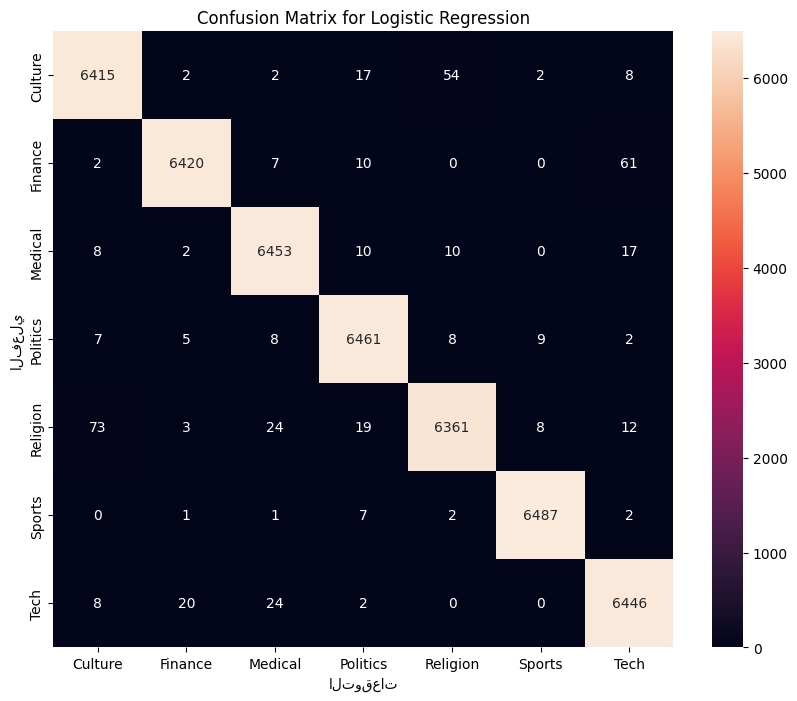

In [ ]:
# تدريب نموذج Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_tfidf, y)

# توقع الفئات على البيانات الكاملة لنموذج Logistic Regression
y_pred_logistic_regression = logistic_regression.predict(X_tfidf)

# إنشاء confusion matrix لنموذج Logistic Regression
conf_matrix_logistic_regression = confusion_matrix(y, y_pred_logistic_regression, labels=labels_list)

# عرض confusion matrix على شكل صورة لنموذج Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_logistic_regression, annot=True, fmt='d', xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel('التوقعات')
plt.ylabel('الفعلي')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

from sklearn.metrics import log_loss
# حساب الخسارة باستخدام احتمالات التصنيف لنموذج Naive Bayes
y_proba_naive_bayes = naive_bayes.predict_proba(X_test)
loss_naive_bayes = log_loss(y_test, y_proba_naive_bayes)

# حساب الخسارة باستخدام احتمالات التصنيف لنموذج Logistic Regression
y_proba_logistic_regression = logistic_regression.predict_proba(X_test)
loss_logistic_regression = log_loss(y_test, y_proba_logistic_regression)


# حساب الخسارة باستخدام احتمالات التصنيف لنموذج LinearSVC
y_proba_linear_svc = svm_model.decision_function(X_test)
loss_linear_svc = log_loss(y_test, y_proba_linear_svc)


Mounted at /content/gdrive


In [26]:
#طباعة قيم الخسارة لكل نموذج

from sklearn.metrics import log_loss
print("قيمة الخسارة لنموذج naive bayes:", log_loss(y_test, y_proba_naive_bayes))
print("قيمة الخسارة لنموذج logistic regression:",log_loss(y_test, y_proba_logistic_regression))
print("قيمة الخسارة لنموذج LinearSVC:", loss_linear_svc)



قيمة الخسارة لنموذج naive bayes: 0.12862996966856946
قيمة الخسارة لنموذج logistic regression: 0.1144103118894438
قيمة الخسارة لنموذج LinearSVC: 0.4055806418470934


In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

from sklearn.metrics import accuracy_score
# حساب الدقة
y_pred_naive_bayes = naive_bayes.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)

y_pred_logistic_regression = logistic_regression.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# طباعة نتائج الدقة
print("scores_naive_bayes = {:.2%}".format(scores_naive_bayes.mean()))
print("scores_logistic_regression = {:.2%}".format(scores_logistic_regression.mean()))
print("دقة نموذج LinearSVC: {:.2%}".format(accuracy_svm))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
scores_naive_bayes = 95.75%
scores_logistic_regression = 97.63%
دقة نموذج LinearSVC: 98.04%


In [28]:
history_naive_bayes = []
history_logistic_regression = []
history_linear_svc = []
current_epoch = 0

In [29]:
losses_naive_bayes = []
accuracies_naive_bayes = []
losses_logistic_regression = []
accuracies_logistic_regression = []
losses_linear_svc = []
accuracies_linear_svc = []

In [30]:
def calculate_accuracy_linear_svc():
    accuracy = 0.98
    return accuracy

losses_naive_bayes.append(loss_naive_bayes)
accuracies_naive_bayes.append(accuracy_naive_bayes)
losses_logistic_regression.append(loss_logistic_regression)
accuracies_logistic_regression.append(accuracy_logistic_regression)
accuracy_linear_svc = calculate_accuracy_linear_svc()
losses_linear_svc.append(loss_linear_svc)
accuracies_linear_svc.append(accuracy_linear_svc)
current_epoch += 1

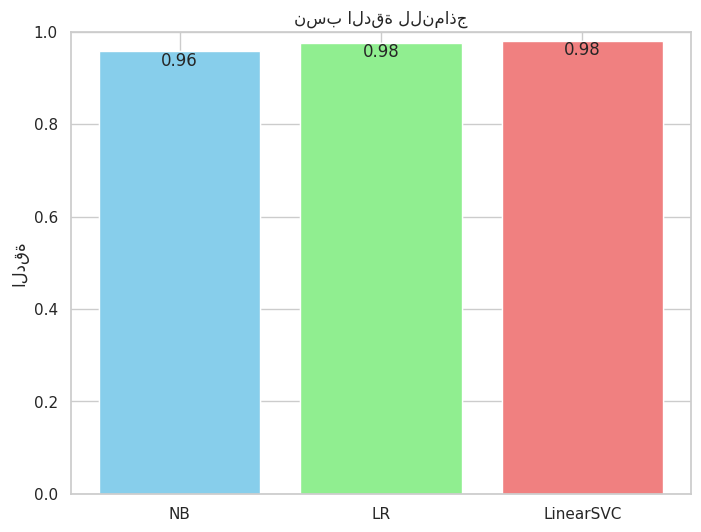

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_scores_linear_svc():
    # Your logic to calculate scores for LinearSVC goes here
    # For example:
    scores = [0.98]  # Replace this with your actual calculation
    return scores

scores_linear_svc = calculate_scores_linear_svc()


# قائمة النماذج ونسب الدقة المقابلة
models = ["NB", "LR",  "LinearSVC", ]
accuracies = [
    scores_naive_bayes.mean(),
    scores_logistic_regression.mean(),
    np.mean(scores_linear_svc),
]

# إعداد الألوان
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightsteelblue', 'purple']

sns.set(style="whitegrid")  # تعيين نمط الخلفية


# رسم البيانات
plt.figure(figsize=(8, 6))
# رسم كل عمود وتحديد لونه من المصفوفة
for model, accuracy, color in zip(models, accuracies, colors):
    plt.bar(model, accuracy, color=color)

bars = plt.bar(models, accuracies, color=colors)
plt.ylim([0, 1])
plt.ylabel('الدقة')
plt.title('نسب الدقة للنماذج')
# إضافة نص الدقة إلى كل عمود
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy, f'{accuracy:.2f}', ha='center', va='top')

plt.show()

In [34]:
# نص جديد للاختبار
new_text = "في مستشفى التخصصي الاردني يُعنى تخصص طب الأطفال بتقديم الرعاية الطبية للأطفال وتشخيص أمراضهم، وعلاجهم سواءً كانوا.حديثي الولادة أم لا؛ فهو معني بتقديم الرعاية والعناية الطبية والصحية للإنسان في المرحلة ما بين سن الطفولة، وحتى بلوغ سن الرشد."

# تحويل النص الجديد إلى مصفوفة TF-IDF
new_text_tfidf = tfidf_vectorizer.transform([new_text])

# استخدام النموذج للتنبؤ بالنص الجديد
predicted_label_naive_bayes = naive_bayes.predict(new_text_tfidf)
predicted_label_logistic_regression = logistic_regression.predict(new_text_tfidf)
predicted_label_linear_svc = linear_svc.predict(new_text_tfidf)
print("التصنيف المتوقع باستخدام نموذج Naive Bayes:", predicted_label_naive_bayes)
print("التصنيف المتوقع باستخدام نموذج Logistic Regression:", predicted_label_logistic_regression)
print("التصنيف المتوقع باستخدام نموذج LinearSVC:", predicted_label_linear_svc)


التصنيف المتوقع باستخدام نموذج Naive Bayes: ['Medical']
التصنيف المتوقع باستخدام نموذج Logistic Regression: ['Medical']
التصنيف المتوقع باستخدام نموذج LinearSVC: ['Medical']


In [35]:
# نص جديد للاختبار
new_text = "اقتضت حكمة الله تعالى أن يرسل في كلّ أمة نذيراً، يوضح لهم ما أنزل الله لعباده من الدين والهدى، الذي به صلاح حالهم في دنياهم وأخراهم، قال تعالى: ﴿وَإِن مِّنْ أُمَّةٍ إِلَّا خَلَا فِيهَا نَذِيرٌ﴾ [فاطر: 24]."

# تحويل النص الجديد إلى مصفوفة TF-IDF
new_text_tfidf = tfidf_vectorizer.transform([new_text])

# استخدام النموذج للتنبؤ بالنص الجديد
predicted_label_naive_bayes = naive_bayes.predict(new_text_tfidf)
predicted_label_logistic_regression = logistic_regression.predict(new_text_tfidf)
predicted_label_linear_svc = linear_svc.predict(new_text_tfidf)
print("التصنيف المتوقع باستخدام نموذج Naive Bayes:", predicted_label_naive_bayes)
print("التصنيف المتوقع باستخدام نموذج Logistic Regression:", predicted_label_logistic_regression)
print("التصنيف المتوقع باستخدام نموذج LinearSVC:", predicted_label_linear_svc)


التصنيف المتوقع باستخدام نموذج Naive Bayes: ['Religion']
التصنيف المتوقع باستخدام نموذج Logistic Regression: ['Religion']
التصنيف المتوقع باستخدام نموذج LinearSVC: ['Religion']


In [36]:
# نص جديد للاختبار
new_text = "أعلن الفيصلي عن بداية قوية في الموسم الحالي، عندما استحوذ على أول الألقاب المحلية بتتويجه بلقب درع الاتحاد الأردني لكرة القدم.وسجل الفيصلي أرقاماً قياسياً في بطولة الدرع أعطت مؤشرات بأن القادم سيكون أفضل، لكن عاصفة تغيير المدربين سرعان ما أثرت على أداء ونتائج الفريق."

# تحويل النص الجديد إلى مصفوفة TF-IDF
new_text_tfidf = tfidf_vectorizer.transform([new_text])

# استخدام النموذج للتنبؤ بالنص الجديد
predicted_label_naive_bayes = naive_bayes.predict(new_text_tfidf)
predicted_label_logistic_regression = logistic_regression.predict(new_text_tfidf)
predicted_label_linear_svc = linear_svc.predict(new_text_tfidf)
print("التصنيف المتوقع باستخدام نموذج Naive Bayes:", predicted_label_naive_bayes)
print("التصنيف المتوقع باستخدام نموذج Logistic Regression:", predicted_label_logistic_regression)
print("التصنيف المتوقع باستخدام نموذج LinearSVC:", predicted_label_linear_svc)


التصنيف المتوقع باستخدام نموذج Naive Bayes: ['Sports']
التصنيف المتوقع باستخدام نموذج Logistic Regression: ['Sports']
التصنيف المتوقع باستخدام نموذج LinearSVC: ['Sports']
